## PRAKTIKUM 1 - Klasifikasi Iris dengan Perceptron


Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.
Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.

#### Langkah 1 - Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

c:\Users\shofiatul\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Langkah 2 - Load Data dan Visualisasi

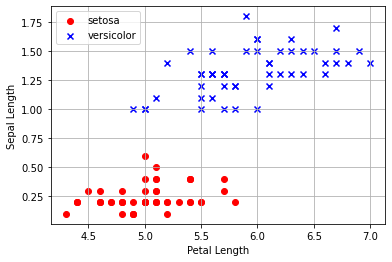

In [3]:
# Mengimpor pustaka pandas untuk membaca dataset dari file CSV
df = pd.read_csv('iris.csv', header=None)

# Membuat subset dataset untuk masing-masing spesies Iris
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

# Menentukan fitur yang akan digunakan dalam visualisasi (Petal Length dan Sepal Length)
a, b = 0, 3

# Membuat scatter plot untuk masing-masing spesies dengan warna dan marker yang berbeda
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

# Memberi label sumbu x dan y pada grafik
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')

# Menambahkan legenda untuk spesies
plt.legend(loc='upper left')

# Mengaktifkan tampilan grid pada grafik
plt.grid()

# Menampilkan plot grafik
plt.show()


#### Langkah 3 - Membuat Kelas Perceptron

In [4]:
# Membuat kelas Perceptron
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta  # Learning rate (tingkat pembelajaran)
        self.n_iter = n_iter  # Jumlah iterasi
    
    def fit(self, X, y):
        # Inisialisasi bobot dengan nilai nol dan inisialisasi daftar error
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        # Menghitung input netto (dot product antara bobot dan fitur)
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        # Mengembalikan label kelas (1 atau -1) berdasarkan net input
        return np.where(self.net_input(X) >= 0.0, 1, -1)


#### Langkah 4 - Pilih Data dan Encoding Label

In [5]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

#### Langkah 5 - Fitting Model

In [6]:
# Membuat objek perceptron dengan learning rate (eta) 0.1 dan jumlah iterasi 10
ppn = Perceptron(eta=0.1, n_iter=10)

# Melatih model perceptron dengan data X dan label y
ppn.fit(X, y)


#### Langkah 6 - Visualisasi Nilai Error Per Epoch

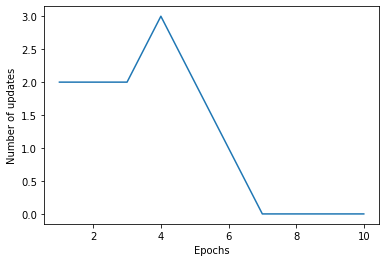

In [7]:
# Plot grafik jumlah perbaruan (updates) model Perceptron terhadap jumlah iterasi (epochs)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)

# Memberi label sumbu x
plt.xlabel('Epochs')

# Memberi label sumbu y
plt.ylabel('Number of updates')

# Menampilkan grafik
plt.show()


#### Langkah 7 - Visualiasasi Decision Boundary

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


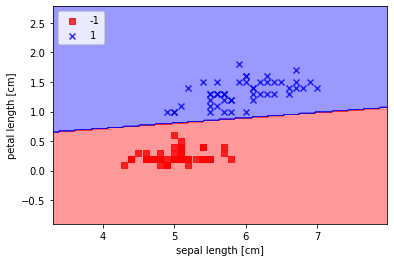

In [8]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)
        
plot_decision_regions(X, y, ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## PRAKTIKUM 2 - Klasifikasi Berita dengan Perceptron


Dalam kasus ini, Anda akan melakukan klasifiaksi berita berdasarkan 3 kategori, yaitu Sport Hockey, Sport Baseball, dan Otomotif. Proses klasifikasi akan menggunakan model Perceptron.

#### Langkah 1 - Import Library

In [9]:
# Mengimpor modul untuk mengunduh dataset
from sklearn.datasets import fetch_20newsgroups

# Mengimpor modul untuk melakukan ekstraksi fitur dari teks menggunakan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengimpor modul untuk algoritma klasifikasi Perceptron
from sklearn.linear_model import Perceptron

# Mengimpor metrik evaluasi untuk mengukur kinerja model
from sklearn.metrics import f1_score, classification_report


#### Langkah 2 - Pilih Label dan Split Data

In [10]:
# Menentukan kategori yang akan digunakan untuk pengunduhan dataset
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']

# Mengunduh dataset pelatihan (train) yang terdiri dari teks berita
# dan menghilangkan bagian header, footer, dan kutipan pada teks.
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Mengunduh dataset pengujian (test) dengan kategori yang sama
# dan juga menghilangkan bagian header, footer, dan kutipan pada teks.
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))


#### Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

In [11]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



#### Penjelasan

Dataset yang digunakan pada kode program diatas adalah 20newsgroup yang terdiri dari sekitar 20.000 dokumen. Scikit-learn bahkan menyediakan fungsi yang memberikan kemudahan untuk mengunduh dan membaca kumpulan dataset dengan menggunakan sklearn.datasets. pada kode program diatas Perceptron mampu melakukan klasifikasi multikelas; strategi yang digunakan adalah one-versus-all untuk melakukan pelatihan untuk setiap kelas dalam data training. Dokumen teks memerlukan ekstraksi fitur salah satunya adalah bobot tf-idf pada kodeprogram diatas digunakan tfidf-vectorizer.

## Praktikum 3 - Nilai Logika XOR dengan MLP



#### Deskripsi

Pada kasus sederhana ini, Anda akan menggunakan MLP untuk mendapatkan nilai biner yang dioperasikan dengan logika XOR. Perlu diingat bahwa nilai XOR berbeda dengan OR, XOR hanya akan bernilai benar jika salah satu nilai yang benar, bukan keduanya atau tidak sama sekali.

#### Langkah 1 - Import Library

In [12]:
from sklearn.neural_network import MLPClassifier

#### Langkah 2 - Buat Data

In [13]:
# Menginisialisasi label (y) dan data (X)
y = [0, 1, 1, 0]  # Label
X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # Data

# Variabel `y` berisi label-label yang menunjukkan klasifikasi atau kelompok data.
# Variabel `X` berisi data-data yang memiliki atribut atau fitur yang digunakan untuk pelatihan model.


#### Langkah 3 - Fit Model

In [14]:
# Fit model
# Membuat objek model Multi-Layer Perceptron (MLP) dengan konfigurasi berikut:
# - Solver 'lbfgs' digunakan untuk optimisasi berdasarkan metode quasi-Newton.
# - Aktivasi 'logistic' menggambarkan fungsi aktivasi sigmoid untuk lapisan tersembunyi.
# - Jumlah neuron dalam lapisan tersembunyi adalah (2,), artinya terdapat satu lapisan tersembunyi dengan 2 neuron.
# - Maksimum iterasi pelatihan adalah 100.
# - Random state digunakan untuk reproduksibilitas hasil pelatihan.
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)

# Melatih model
# Melatih model MLP dengan data (X) dan label (y) yang telah diberikan.
clf.fit(X, y)


MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

#### Langkah 4 - Prediksi

In [15]:
# Melakukan prediksi dengan model yang telah dilatih
pred = clf.predict(X)

# Menghitung akurasi model
# Menampilkan akurasi model dengan membandingkan hasil prediksi dengan label sebenarnya (y).
print('Accuracy: %s' % clf.score(X, y))

# Menampilkan hasil prediksi untuk 10 sampel pertama
# Iterasi melalui 10 sampel pertama dan mencetak hasil prediksi dan label sebenarnya.
for i, p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))


Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


## Praktikum 4 - Klasifikasi dengan ANN



#### Deskripsi

Pada praktikum kali ini, Anda diminta untuk membuat model ANN untuk mengklasifikasi potensi seorang customer akan meninggalkan perusahaan Anda atau tidak. Istirlah populer dari fenomena ini disebut sebagai 'churn'. Tingkat churn yang tinggi (chrun rate) akan berdampak tidak baik bagi perusahaan.

#### Pra Pengolahan Data

#### Langkah 1 - Import Library

In [16]:
pip install tensorflow


In [17]:
#import library
import numpy as np
import pandas as pd
import tensorflow as tf

#### Langkah 2 - Load Data

In [18]:
# Mengimpor dataset dari file CSV
dataset = pd.read_csv('Churn_Modelling.csv')

# Memisahkan fitur (X) dan label (y)
# Mengambil kolom 4 hingga kolom sebelum terakhir sebagai fitur dan kolom terakhir sebagai label.
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values


In [19]:
#Cek Data (X)
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


#### Langkah 3 - Encoding Data Kategorikal

In [20]:
# Mengimpor LabelEncoder dari modul sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
le = LabelEncoder()

# Menggunakan LabelEncoder untuk mengkodekan data pada kolom ke-3 (indeks 2) dari fitur (X)
X[:, 2] = le.fit_transform(X[:, 2])


Cek data (X) dengan print. 

In [21]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


#### Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [22]:
# Mengimpor ColumnTransformer dan OneHotEncoder dari modul sklearn.compose dan sklearn.preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Membuat objek ColumnTransformer
# Menggunakan OneHotEncoder untuk mengkodekan data pada kolom ke-1 (indeks 0) dari fitur (X)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')

# Mengubah fitur (X) dengan menggunakan ColumnTransformer
X = np.array(ct.fit_transform(X))


In [23]:
#Cek data (X) dengan print
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


#### Langkah 5 - Split Data

In [24]:
# Mengimpor train_test_split dari modul sklearn.model_selection
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data latih dan data uji
# X_train dan X_test adalah fitur dari data latih dan data uji
# y_train dan y_test adalah label dari data latih dan data uji
# test_size adalah proporsi data uji (dalam contoh ini, 0.2 berarti 20% dari total data akan menjadi data uji)
# random_state digunakan untuk mengontrol hasil acak agar reproduktif
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


#### Langkah 6 - Scaling Fitur

In [25]:
# Mengimpor StandardScaler dari modul sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler
sc = StandardScaler()

# Mengubah skala data fitur pada data latih
X_train = sc.fit_transform(X_train)

# Mengubah skala data fitur pada data uji menggunakan parameter yang sama yang telah dipelajari dari data latih
X_test = sc.transform(X_test)


## Membuat Model ANN

#### Langkah 1 - Inisiasi Model ANN

In [26]:
# Membuat objek model sequential untuk jaringan saraf tiruan
ann = tf.keras.models.Sequential()


#### Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [27]:
# Menambahkan layer Dense dengan 6 unit neuron dan aktivasi ReLU
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))


#### Langkah 3 - Membuat Hidden Layer Kedua

In [28]:
# Menambahkan layer Dense dengan 6 unit neuron dan aktivasi ReLU
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))


#### Langkah 4 - Membuat Output Layer

In [29]:
# Menambahkan layer Dense dengan 1 unit neuron dan aktivasi Sigmoid
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


## Training Model

#### Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [30]:
# Mengompilasi model jaringan saraf
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


#### Langkah 2 - Fitting Model

In [31]:
# Melatih model jaringan saraf
ann.fit(X_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
250/250 [==============================] - 3s 4ms/step - loss: 0.5735 - accuracy: 0.7590
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4864 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4532 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4369 - accuracy: 0.8004
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4290 - accuracy: 0.8110
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4231 - accuracy: 0.8156
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4186 - accuracy: 0.8179
Epoch 8/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4141 - accuracy: 0.8220
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4109 - accuracy: 0.8225
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4080 - accura

## Membuat Prediksi

Diberikan informasi sebagai berikut,
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: $ 60000
- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

#### Modelkan Data Baru dan Buat Prediksi

In [32]:
# Melakukan prediksi dengan model jaringan saraf
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)


1/1 [==============================] - 0s 190ms/step
[[False]]


Apakah hasilnya False?

Jawab : Iya

#### Prediksi Dengan Data Testing

In [33]:
# Melakukan prediksi pada data uji dan menampilkan hasil prediksi serta label sebenarnya
y_pred = ann.predict(X_test)  # Melakukan prediksi menggunakan model jaringan saraf pada data uji
y_pred = (y_pred > 0.5)  # Mengubah probabilitas prediksi menjadi label biner (True atau False)

# Menggabungkan hasil prediksi dengan label sebenarnya dan menampilkannya
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))


63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


#### Cek Akurasi dan Confusion Matrix

In [34]:
# Mengimpor modul yang diperlukan
from sklearn.metrics import confusion_matrix, accuracy_score

# Menghitung matriks konfusi berdasarkan hasil prediksi dan label sebenarnya pada data uji
cm = confusion_matrix(y_test, y_pred)

# Menampilkan matriks konfusi
print(cm)

# Menghitung tingkat akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan tingkat akurasi
print(accuracy)


[[1516   79]
 [ 194  211]]
0.8635
